In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.integrate import quad

In [56]:
WinRate_df = pd.read_csv("MarvelRivals_WinRate_Matrix.csv", index_col=0)
NumMatches_df = pd.read_csv("MarvelRivals_NumMatches_Matrix.csv", index_col=0)

min_value = WinRate_df.min().min()
max_value = WinRate_df.max().max()
min_value

33.51

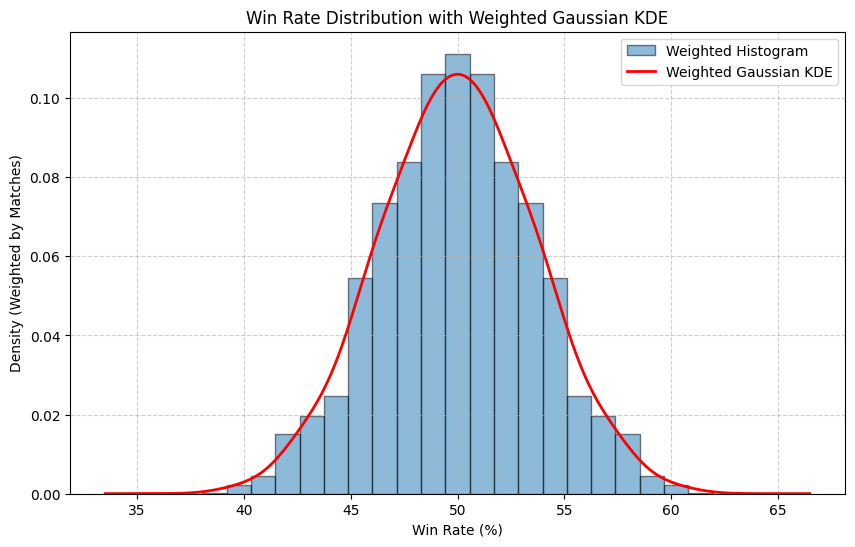

In [50]:
win_rates = WinRate_df.astype(float).values.flatten()
num_matches = NumMatches_df.astype(float).values.flatten()

valid_indices = np.isfinite(win_rates) & np.isfinite(num_matches)
win_rates = win_rates[valid_indices]
num_matches = num_matches[valid_indices]

kde = gaussian_kde(win_rates, weights=num_matches)

x_values = np.linspace(min_value, max_value, 500)
kde_values = kde(x_values)

plt.figure(figsize=(10, 6))
plt.hist(win_rates, bins=np.linspace(min_value, max_value, 30), weights=num_matches, edgecolor='black', alpha=0.5, density=True, label="Weighted Histogram")

plt.plot(x_values, kde_values, color='red', linewidth=2, label="Weighted Gaussian KDE")

plt.xlabel("Win Rate (%)")
plt.ylabel("Density (Weighted by Matches)")
plt.title("Win Rate Distribution with Weighted Gaussian KDE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [63]:
def utility_score(kde, winrate, min_value, max_value):
    total_cdf, _ = quad(kde, min_value, max_value)
    cdf, _ = quad(kde, min_value, winrate)
    utility = ((cdf - (total_cdf / 2)) / (total_cdf / 2))
    return round(utility, 2)


utility_score(kde, 33, min_value, max_value)

-1.0

In [66]:
Payoff_df = WinRate_df.copy()

for row_hero in WinRate_df.index:
    for col_hero in WinRate_df.columns:
        winrate = WinRate_df.at[row_hero, col_hero]  # Get the win rate
        Payoff_df.at[row_hero, col_hero] = utility_score(kde, winrate, min_value, max_value)

Payoff_df = Payoff_df.astype(float)

In [67]:
Payoff_df.to_csv("MarvelRivals_Payoff_Matrix.csv")
Payoff_df

,Captain America,Doctor Strange,Groot,Hulk,Magneto,Peni Parker,The Thing,Thor,Venom,Black Panther,...,Winter Soldier,Wolverine,Adam Warlock,Cloak & Dagger,Invisible Woman,Jeff The Land Shark,Loki,Luna Snow,Mantis,Rocket Raccoon
Captain America,-0.00,0.54,0.42,0.40,0.71,0.02,0.52,0.24,0.72,0.07,...,0.51,0.52,0.13,0.81,0.79,0.96,-0.02,0.88,-0.04,-0.41
Doctor Strange,-0.54,-0.00,-0.08,-0.40,0.19,-0.62,-0.27,-0.47,0.03,-0.57,...,-0.09,-0.28,-0.40,0.54,0.22,0.59,-0.45,0.37,-0.59,-0.79
Groot,-0.42,0.08,-0.00,-0.33,0.44,-0.61,0.03,-0.37,0.20,-0.54,...,0.16,0.25,-0.10,0.59,0.33,0.68,-0.28,0.68,-0.43,-0.61
Hulk,-0.40,0.40,0.33,-0.00,0.52,-0.49,0.19,0.01,0.22,-0.41,...,0.19,0.22,-0.07,0.77,0.59,0.91,-0.00,0.68,-0.42,-0.70
Magneto,-0.71,-0.19,-0.44,-0.52,-0.00,-0.78,-0.44,-0.66,-0.28,-0.68,...,-0.35,-0.60,-0.49,0.35,0.04,0.55,-0.53,0.28,-0.70,-0.90
Peni Parker,-0.02,0.62,0.61,0.49,0.78,-0.00,0.48,0.12,0.40,-0.53,...,0.58,0.49,0.41,0.85,0.76,0.99,0.29,0.89,0.02,-0.48
The Thing,-0.52,0.27,-0.03,-0.19,0.44,-0.48,-0.00,-0.32,-0.09,-0.41,...,0.07,-0.57,-0.17,0.60,0.48,0.81,-0.20,0.58,-0.49,-0.82
Thor,-0.24,0.47,0.37,-0.01,0.66,-0.12,0.32,-0.00,0.41,-0.01,...,0.29,0.41,0.07,0.79,0.69,0.96,0.12,0.76,-0.18,-0.55
Venom,-0.72,-0.03,-0.20,-0.22,0.28,-0.40,0.09,-0.41,-0.00,-0.54,...,-0.04,-0.31,-0.37,0.42,0.39,0.80,-0.28,0.54,-0.65,-0.90
Black Panther,-0.07,0.57,0.54,0.41,0.68,0.53,0.41,0.01,0.54,-0.00,...,0.35,-0.17,0.11,0.84,0.75,0.96,0.37,0.85,-0.11,-0.66
